In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("/home/ubuntu/FEAOF")
from unit import merge_fp_des
import pickle


In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')


In [3]:
def load_des_pkl(pkl_path):
    with open(pkl_path, 'rb') as handle:
        mols_rep = pickle.load(handle)
    return mols_rep

In [4]:
from unit import  compute_physchem

In [5]:
Train_Val = pd.read_csv("/home/ubuntu/FEAOF/data/IF_Data/Train_Val_IF.csv")
# Train_Val = Train_Val[Train_Val["split"] == "test"]

In [6]:
Train_Val = Train_Val.iloc[:,:4]

In [7]:
des = pd.DataFrame(compute_physchem(Train_Val["smiles"].tolist()))

In [8]:
des.columns=["MW", "LogP", "H-Bond Donor", "H-Bond Acceptors", "Rotatable Bonds", "Atoms", "Heavy Atoms",
                           "Molar Refractivity", "TPSA", "Formal Charge", "Rings"]

In [9]:
Train_Val_des = pd.concat([Train_Val,des ],axis=1)

In [10]:
Train_Val_des.rename(columns={"r_i_docking_score": "Docking Score"}, inplace=True)

In [11]:
Train_Val_des

,smiles,y,split,Docking Score,MW,LogP,H-Bond Donor,H-Bond Acceptors,Rotatable Bonds,Atoms,Heavy Atoms,Molar Refractivity,TPSA,Formal Charge,Rings
0,COc1cnc2ccc(=O)n(CCN3CCN(c4nc5cc(C(F)(F)F)ccc5...,0,train,-4.896209,472.183459,3.12240,1.0,7.0,5.0,34.0,34.0,122.3037,79.28,0.0,4.0
1,Cc1ccn(CC(=O)N2CCN(c3sc(C(F)(F)F)nc3-c3cnc(C(F...,1,train,-6.967111,535.122513,2.85232,1.0,9.0,5.0,36.0,36.0,114.9078,100.27,0.0,3.0
2,COc1ccc(-c2nnc(C(=O)N3CC(Oc4ccc(CN5CC6(CCOC6)C...,0,train,0.465703,476.205970,2.87090,0.0,8.0,7.0,35.0,35.0,126.1935,90.16,0.0,3.0
3,CC(C)(O)c1ccc(-c2cccc(N(CC34CCC(c5noc(C(C)(C)F...,1,train,0.000000,643.303320,7.49720,2.0,6.0,8.0,46.0,46.0,163.4496,99.69,0.0,3.0
4,CN1CCC(NC(=O)c2cnc(NCc3cc(Cl)ccc3Cl)nc2NC2CCCC...,0,train,-5.545103,476.185815,4.57400,3.0,6.0,7.0,32.0,32.0,129.6846,82.18,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14956,CC(C)Cc1ccc([C@@H](C)C(=O)O)cc1,0,train,-4.890586,206.130680,3.07320,1.0,1.0,4.0,15.0,15.0,61.0348,37.30,0.0,1.0
14957,O=C(O)Cc1ccc(-c2ccccc2)cc1,0,train,-4.901171,212.083730,2.98070,1.0,1.0,3.0,16.0,16.0,63.2178,37.30,0.0,2.0
14958,CC(C)Cc1ccc([C@H](C)C(=O)O)cc1,0,train,-5.090362,206.130680,3.07320,1.0,1.0,4.0,15.0,15.0,61.0348,37.30,0.0,1.0
14959,O=C(O)c1cccnc1,0,train,-5.071482,123.032028,0.77980,1.0,2.0,1.0,9.0,9.0,31.1963,50.19,0.0,1.0


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind  # 你也可以改用 mannwhitneyu

# 设置绘图风格
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 16})

# 你要画的列
columns_to_plot = [
    'LogP', 'H-Bond Acceptors',
    'Rotatable Bonds',
    'TPSA',
    "Docking Score",
"MW", "H-Bond Donor", "Atoms", "Heavy Atoms",
                           "Molar Refractivity", "Formal Charge", "Rings"
]

# 遍历每个特征并绘图 + 保存
for col in columns_to_plot:
    # 分组数据
    group0 = Train_Val_des[Train_Val_des['y'] == 0][col].dropna()
    group1 = Train_Val_des[Train_Val_des['y'] == 1][col].dropna()

    # 计算p值（双尾t检验）
    stat, p_value = ttest_ind(group0, group1, equal_var=False)  # Welch's t-test
    
    # 绘图
    plt.figure(figsize=(7.2, 7.2),dpi=600)
    ax = sns.boxplot(x='y', y=col, data=Train_Val_des, palette='pastel')
    ax.set_title(f'{col} of Negative and Positive Samples', fontsize=20)
    ax.set_xlabel('', fontsize=14)
    ax.set_ylabel(col, fontsize=20)
    ax.set_xticklabels(['Negative', 'Positive'])

    # 添加p值注释
    # x1, x2 = 0, 1
    # y_max = max(max(group0), max(group1))
    # y_min = min(min(group0), min(group1))
    # y, h, col_line = y_max + (y_max - y_min) * 0.1, (y_max - y_min) * 0.05, 'k'
    # plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col_line)
    # plt.text((x1 + x2) * 0.5, y + h * 1.1, f"p = {p_value:.3e}", ha='center', va='bottom', fontsize=14)

    # 修改刻度字体大小
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(False)
    # 保存图像
    plt.tight_layout()
    plt.savefig(f"/home/ubuntu/FEAOF/figs/{col}_boxplot.pdf", dpi=600, bbox_inches='tight')
    plt.close()
    # break

/tmp/ipykernel_2435803/3862204445.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='y', y=col, data=Train_Val_des, palette='pastel')
/tmp/ipykernel_2435803/3862204445.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Negative', 'Positive'])


/tmp/ipykernel_2435803/3862204445.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='y', y=col, data=Train_Val_des, palette='pastel')
/tmp/ipykernel_2435803/3862204445.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Negative', 'Positive'])
/tmp/ipykernel_2435803/3862204445.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='y', y=col, data=Train_Val_des, palette='pastel')
/tmp/ipykernel_2435803/3862204445.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Negative', 'Positive'])
/tmp/ipykernel_2435803/3862204445.py:31: FutureWarning: 

Passing `palette` without 

关键氨基酸作用

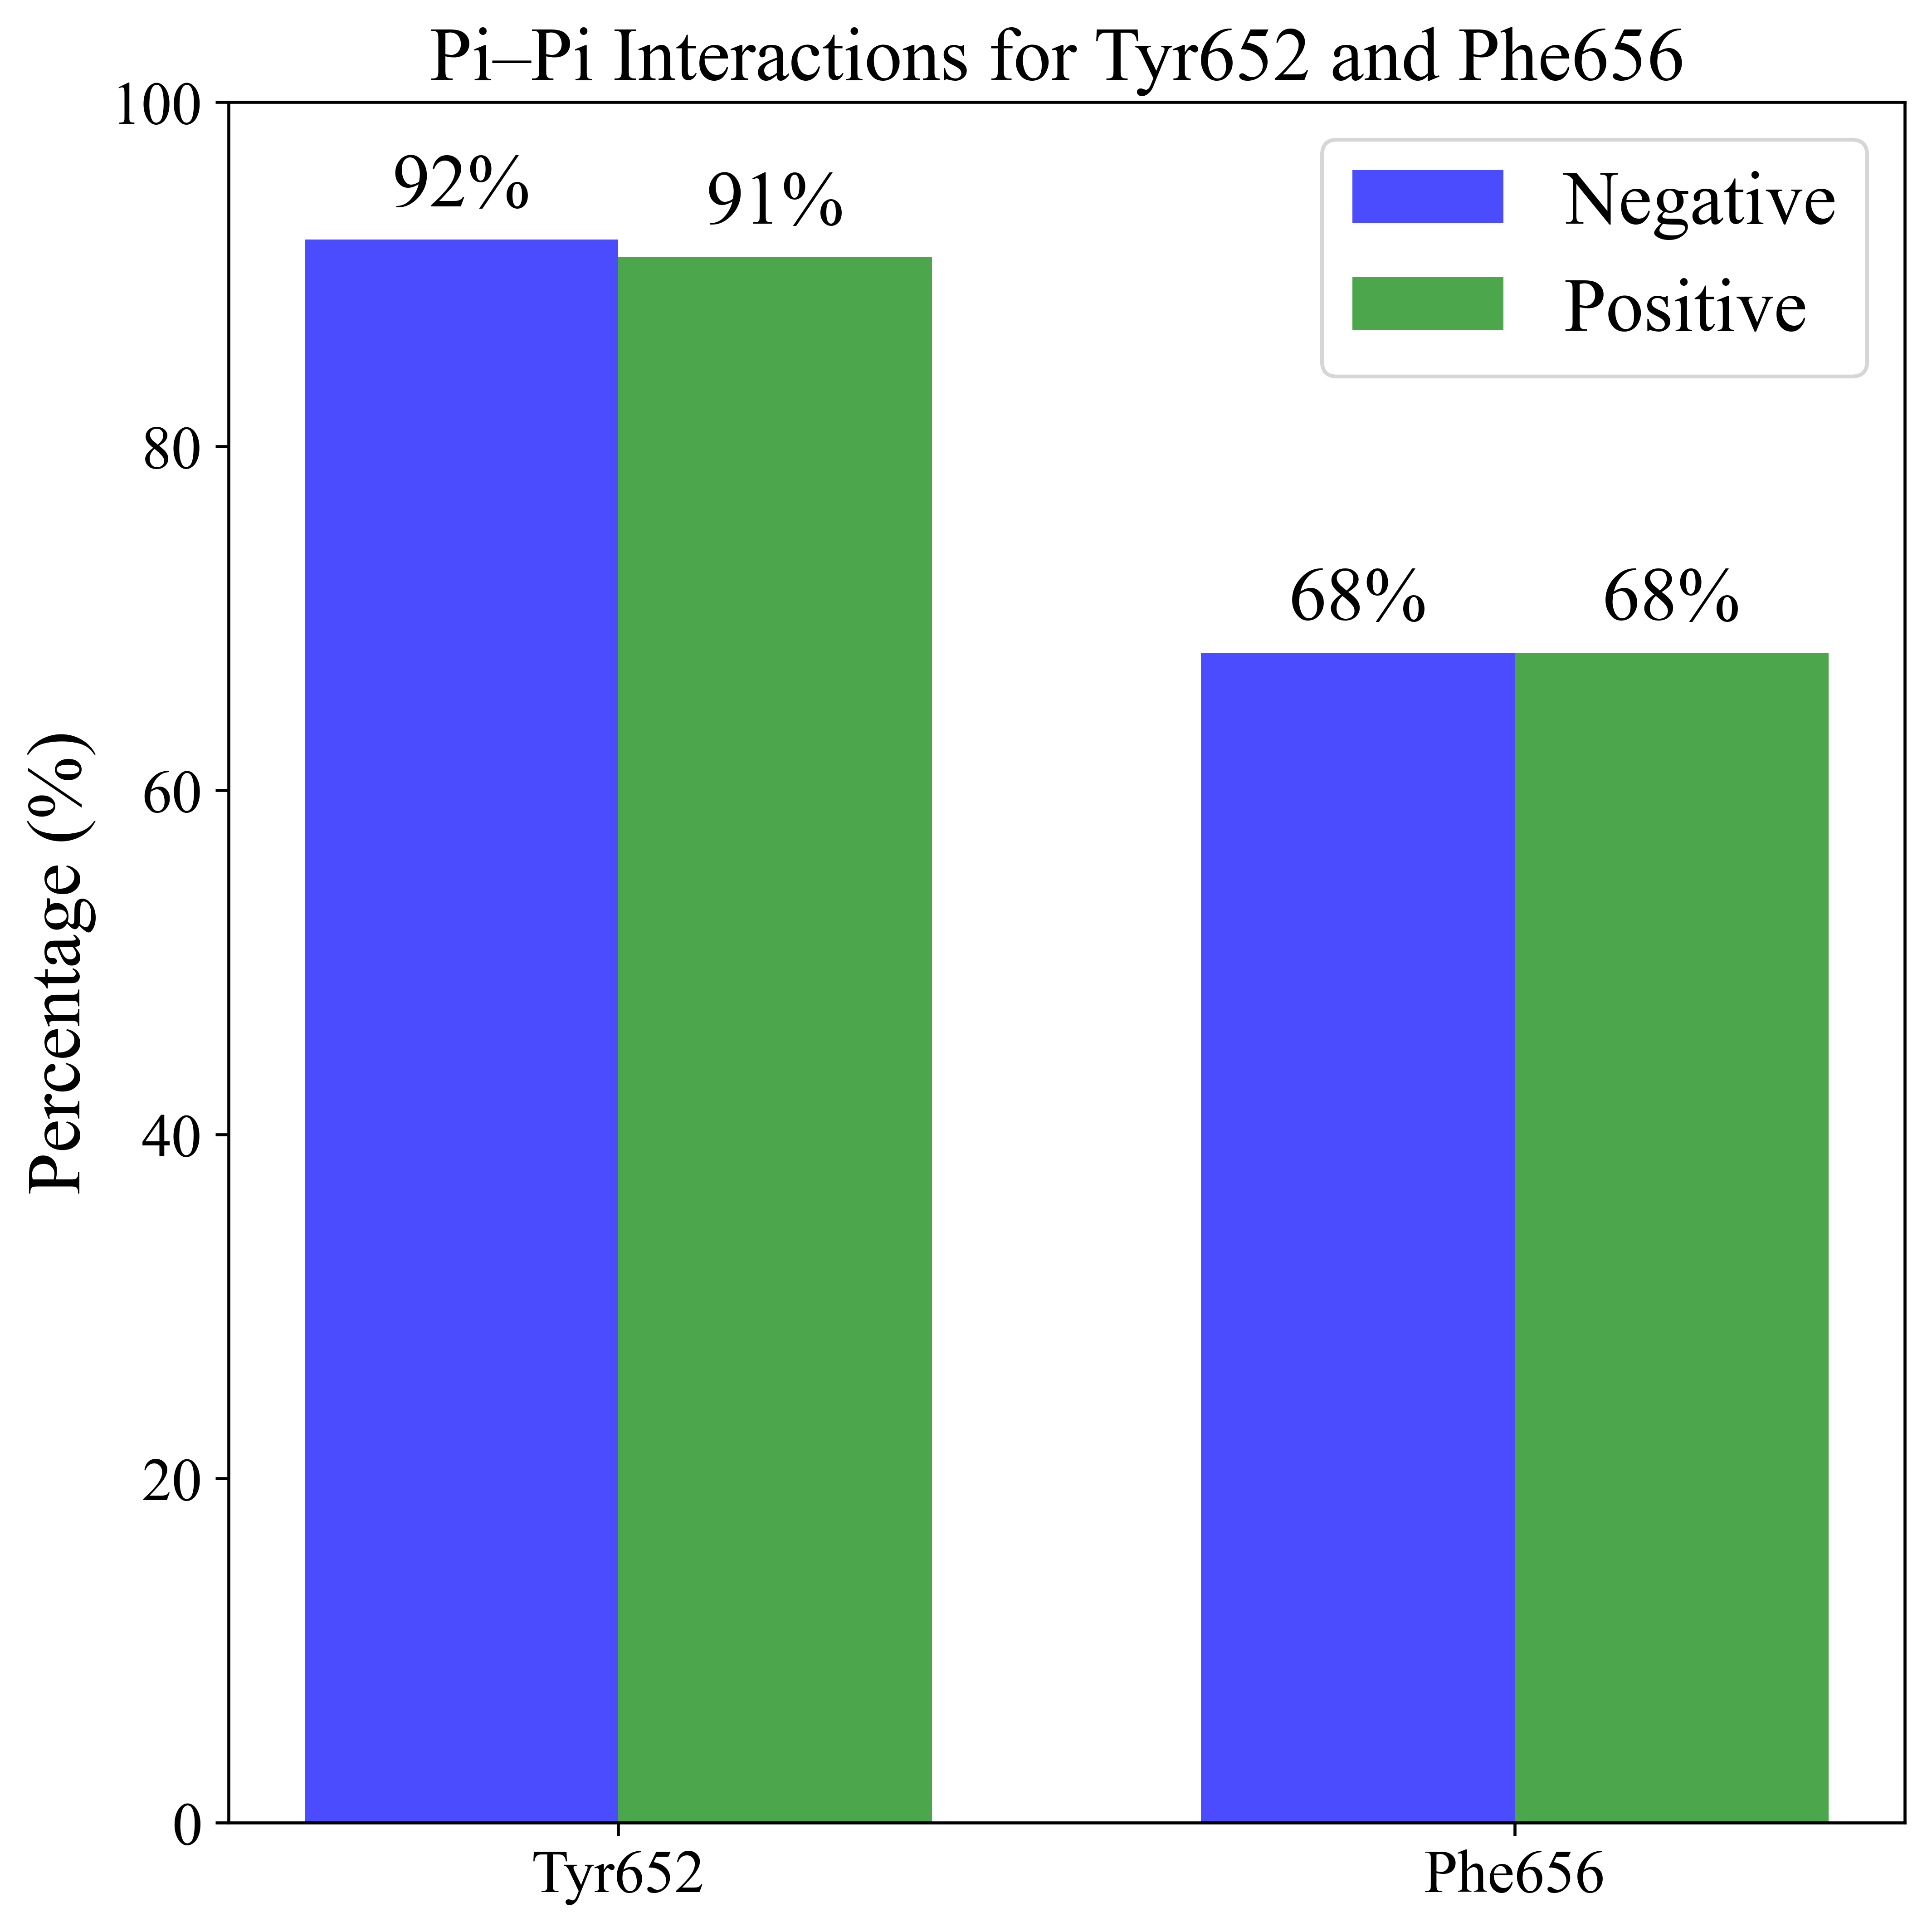

In [1]:
# import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')


# 数据
categories = ['Tyr652', 'Phe656']
values = [[92, 91], [68, 68]]  # Negative 和 Positive 的百分比
x = np.arange(len(categories))
bar_width = 0.35

# 颜色（浅色）
light_blue = '#ADD8E6'
light_green = '#90EE90'

# 创建图表
fig, ax = plt.subplots(figsize=(7.2, 7.2), dpi=600)
bar1 = ax.bar(x - bar_width / 2, [values[0][0], values[1][0]], bar_width, label='Negative', color="blue",alpha=0.7)
bar2 = ax.bar(x + bar_width / 2, [values[0][1], values[1][1]], bar_width, label='Positive', color="green",alpha=0.7)

# 设置字体大小为20
# ax.set_xlabel('Residues', fontsize=20)
ax.set_ylabel('Percentage (%)', fontsize=20)
ax.set_title('Pi–Pi Interactions for Tyr652 and Phe656 ', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=16)
ax.set_ylim(0, 100)
ax.tick_params(axis='y', labelsize=16)
ax.legend(fontsize=20)
ax.grid(False)

# 在每个柱子上方添加标签
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height}%',
                ha='center', va='bottom', fontsize=20)

# 保存图像
output_path = "/home/ubuntu/FEAOF/figs"
os.makedirs(output_path, exist_ok=True)  # 确保路径存在
plt.tight_layout()
plt.savefig(os.path.join(output_path, "fig3_H.pdf"), format='pdf', bbox_inches='tight')
plt.show()


In [15]:
import matplotlib.pyplot as plt
print(plt.rcParams['font.family'])


['Times New Roman']
